In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import random

plt.rc('font', family = 'Times New Roman', size= 12)

In [2]:
L = 2* np.pi  # Tamanho da caixa
N = 5  # Número de pontos de grade
x = np.linspace(-L, L, N)




alerand = np.random.rand(x.size)

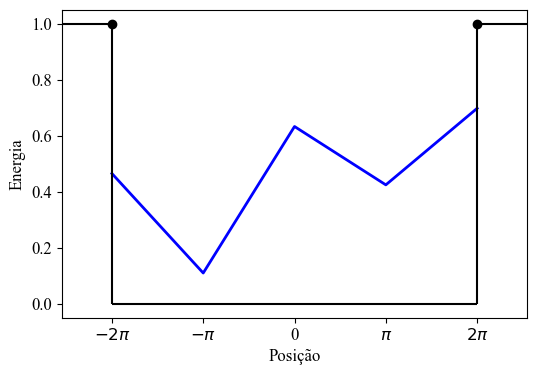

In [3]:
fig1, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(x,alerand, linewidth=2 , color='#0000FF')
plt.stem(x[0], 1, linefmt='k-', markerfmt='ko', basefmt='r-')
plt.hlines(1, xmin=-2.2*L, xmax=x[0], color='k')
plt.stem(x[-1], 1, linefmt='k-', markerfmt='ko', basefmt='r-')
plt.hlines(1, xmin=2.2*L, xmax=x[-1], color='k')
plt.hlines(0, xmin=-L, xmax=L, color='k')
plt.xticks([ -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi],
                    [ '$-2\pi$', '$-\pi$', '0', '$\pi$', '$2\pi$'])
plt.xlabel('Posição')
plt.ylabel('Energia')
plt.xlim(-8,8)
fig1.savefig('Fig_Potencial.pdf')

array([[ 0.10178617, -0.05066059,  0.        ,  0.        ,  0.        ],
       [-0.05066059,  0.10143088, -0.05066059,  0.        ,  0.        ],
       [ 0.        , -0.05066059,  0.1019541 , -0.05066059,  0.        ],
       [ 0.        ,  0.        , -0.05066059,  0.10174571, -0.05066059],
       [ 0.        ,  0.        ,  0.        , -0.05066059,  0.10201902]])

array([0.00046499, 0.00010969, 0.00063292, 0.00042453, 0.00069783])

0.001---


array([[ 0.5663085 , -0.05066059,  0.        ,  0.        ,  0.        ],
       [-0.05066059,  0.211014  , -0.05066059,  0.        ,  0.        ],
       [ 0.        , -0.05066059,  0.73423727, -0.05066059,  0.        ],
       [ 0.        ,  0.        , -0.05066059,  0.52584805, -0.05066059],
       [ 0.        ,  0.        ,  0.        , -0.05066059,  0.79915473]])

array([0.46498731, 0.10969282, 0.63291609, 0.42452686, 0.69783355])

1---


array([[ 4.66000525e+01, -5.06605918e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-5.06605918e-02,  1.10706030e+01, -5.06605918e-02,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -5.06605918e-02,  6.33929297e+01,
        -5.06605918e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -5.06605918e-02,
         4.25540075e+01, -5.06605918e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.06605918e-02,  6.98846758e+01]])

array([46.49873131, 10.96928184, 63.29160851, 42.45268632, 69.78335461])

100---


array([[ 4.64997445e+03, -5.06605918e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-5.06605918e-02,  1.09702950e+03, -5.06605918e-02,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -5.06605918e-02,  6.32926217e+03,
        -5.06605918e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -5.06605918e-02,
         4.24536995e+03, -5.06605918e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.06605918e-02,  6.97843678e+03]])

array([4649.87313122, 1096.92818365, 6329.16085128, 4245.2686323 ,
       6978.3354607 ])

10000---


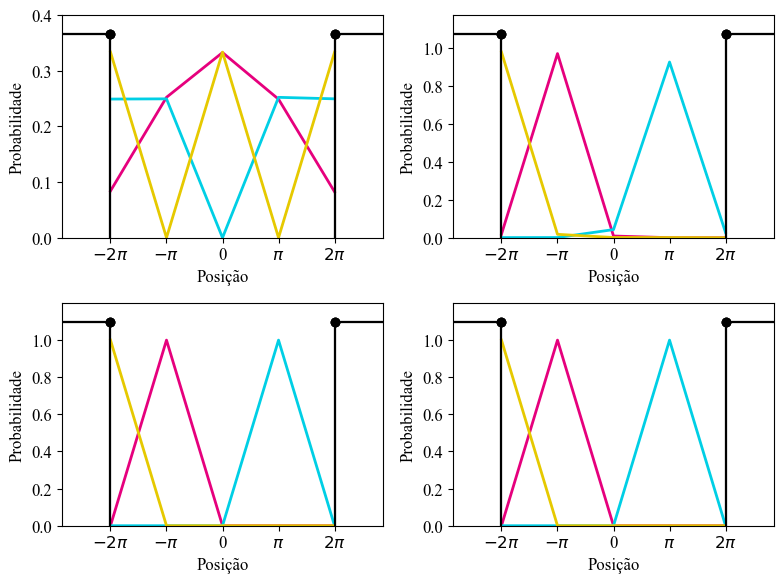

In [4]:
# Plotagem das funções de onda
fig, axs = plt.subplots(2,2, figsize=(8, 6))
desordem = [0.001,1,100,10000]
p=0
for k in range(2):
    for m in range(2):

        # Parâmetros do problema

        h_bar = 1.0  # Constante reduzida de Planck

        # Construção da matriz Hamiltoniana
        dx = x[1] - x[0]
        V = desordem[p] * alerand  # For small values of potential,
        
        H = np.zeros((N, N))


        for i in range(N):
            for j in range(N):
                if i == j:
                    H[i, j] = 1.0 / dx**2 + V[i] / h_bar**2
                elif abs(i - j) == 1:
                    H[i, j] = -0.5 / dx**2

        display(H)
        display(V)
        # Encontrando autovetores e autovalores
        eigenvalues, eigenvectors = eigh(H)



        rho_max = 0
        nmodes=3
        prob = np.zeros((N, nmodes))
        autofun = np.zeros((N, nmodes))
        # cores = ['#FF0000', '#00FF00', '#FFFF00','#00FFFF',  '#0000FF']
        cores = ['#E6007D', '#00CFE5', '#E6C900', '#fe6100', '#ffb000']
        # cores = ['#648fff', '#785ef0', '#dc267f', '#fe6100', '#ffb000']
        letras = ['a)', 'b)', 'c)', 'd)', 'e)','f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)','m)', 'n)', 'o)', 'p)',]
        for i in range(nmodes):        
            psi = eigenvectors[:, i]
            rho = np.abs(psi) ** 2
            autofun[:,i] = np.abs(psi) ** 2
            if rho_max < np.max(rho):
                rho_max = np.max(rho)

        for i in range(nmodes):        
            axs[k, m].plot(x, autofun[:,i], linewidth=2, color=cores[i] )


#             axs[k, m].set_title(f'{desordem[p]} ')
            axs[k, m].set_xlim(-9, 9)  # Define os limites do eixo x
            axs[k, m].set_ylim(0,1.2*rho_max) # Define os limites do eixo y
            axs[k, m].set_ylabel('Probabilidade')
            axs[k, m].set_xlabel('Posição')
            axs[k, m].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi],
                        [ '$-2\pi$', '$-\pi$', '0', '$\pi$', '$2\pi$'])

            axs[k, m].stem(x[0], 1.1 * rho_max, linefmt='k-', markerfmt='ko', basefmt='r-')
            axs[k, m].hlines(1.1 * rho_max, xmin=-2.2 * L, xmax=x[0], color='k')
            axs[k, m].stem(x[-1], 1.1 * rho_max, linefmt='k-', markerfmt='ko', basefmt='r-')
            axs[k, m].hlines(1.1 * rho_max, xmin=2.2* L, xmax=x[-1], color='k')


        print(f"{desordem[p]}---")
        p = p +1
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de subplots
plt.show()

fig.savefig('Fig_Autofun.pdf')

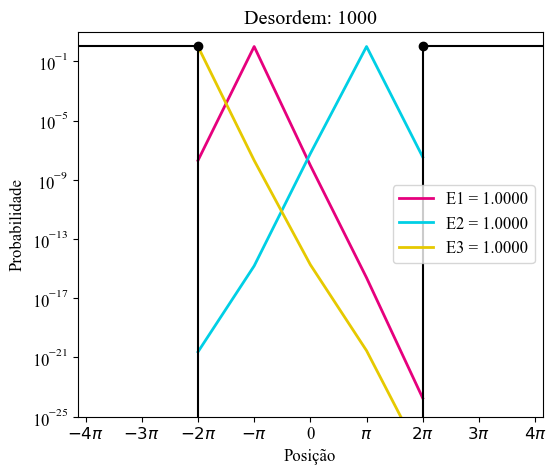

In [5]:
fig2, ax2 = plt.subplots(figsize=(6, 5))
# Parâmetros do problema
desordem = 1000
h_bar = 1.0  # Constante reduzida de Planck

# Construção da matriz Hamiltoniana
dx = x[1] - x[0]
V = desordem * alerand  # For small values of potential,

H = np.zeros((N, N))


for i in range(N):
    for j in range(N):
        if i == j:
            H[i, j] = 1.0 / dx**2 + V[i] / h_bar**2
        elif abs(i - j) == 1:
            H[i, j] = -0.5 / dx**2


# Encontrando autovetores e autovalores
eigenvalues, eigenvectors = eigh(H)



rho_max = 0
nmodes=3
prob = np.zeros((N, nmodes))
autofun = np.zeros((N, nmodes))

for i in range(nmodes):        
    psi = eigenvectors[:, i]
    rho = np.abs(psi) ** 2
    ax2.plot(x, rho, linewidth=2 , color=cores[i],label=f'E{i+1} = {np.max(rho):.4f}')
    autofun[:,i] = psi
    
    if rho_max < np.max(rho):
        rho_max = np.max(rho)


plt.stem(x[0], 1.1*rho_max, linefmt='k-', markerfmt='ko', basefmt='r-')
plt.hlines(1.1*rho_max, xmin=-2.2*L, xmax=x[0], color='k')
plt.stem(x[-1], 1.1*rho_max, linefmt='k-', markerfmt='ko', basefmt='r-')
plt.hlines(1.1*rho_max, xmin=2.2*L, xmax=x[-1], color='k')
plt.ylim(10**-25,10)
plt.xlim(-13,13)
plt.xticks([ -4 * np.pi, -3*np.pi,-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3*np.pi, 4 * np.pi],
                ['$-4\pi$','$-3\pi$', '$-2\pi$', '$-\pi$', '0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])

plt.yscale('log')
plt.title(f'Desordem: {desordem}')
plt.xlabel('Posição')
plt.ylabel('Probabilidade')
plt.legend()
plt.show()

fig2.savefig('Fig_Log.pdf')


In [6]:
# Perguntar para o Romain



# # Plotagem das funções de onda
# fig, axs = plt.subplots(4,4, figsize=(8, 6))
# desordem = [0.1,0.25,0.5,0.75,1,2.5,5,7.5,10,25,50,75,100,250,500,750]
# p=0
# for k in range(4):
#     for m in range(4):

#         # Parâmetros do problema

#         h_bar = 1.0  # Constante reduzida de Planck

#         # Construção da matriz Hamiltoniana
#         dx = x[1] - x[0]
#         V = desordem[p] * alerand  # For small values of potential,

#         H = np.zeros((N, N))


#         for i in range(N):
#             for j in range(N):
#                 if i == j:
#                     H[i, j] = 1.0 / dx**2 + V[i] / h_bar**2
#                 elif abs(i - j) == 1:
#                     H[i, j] = -0.5 / dx**2


#         # Encontrando autovetores e autovalores
#         eigenvalues, eigenvectors = eigh(H)



#         rho_max = 0
#         nmodes=3
#         prob = np.zeros((N, nmodes))
#         autofun = np.zeros((N, nmodes))
#         # cores = ['#FF0000', '#00FF00', '#FFFF00','#00FFFF',  '#0000FF']
#         cores = ['#E6007D', '#00CFE5', '#E6C900', '#fe6100', '#ffb000']
#         # cores = ['#648fff', '#785ef0', '#dc267f', '#fe6100', '#ffb000']
#         letras = ['a)', 'b)', 'c)', 'd)', 'e)','f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)','m)', 'n)', 'o)', 'p)',]
#         for i in range(nmodes):        
#             psi = eigenvectors[:, i]
#             rho = np.abs(psi) ** 2
#             autofun[:,i] = np.abs(psi) ** 2
#             if rho_max < np.max(rho):
#                 rho_max = np.max(rho)

#         for i in range(nmodes):        
#             axs[k, m].plot(x, autofun[:,i], linewidth=2, color=cores[i] )


#             axs[k, m].set_title(f'{desordem[p]} ')
#             axs[k, m].set_xlim(-9, 9)  # Define os limites do eixo x
#             axs[k, m].set_ylim(0,1.2*rho_max) # Define os limites do eixo y
#             axs[k, m].set_ylabel('Probabilidade')
#             axs[k, m].set_xlabel('Posição')
#             axs[k, m].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi],
#                         [ '$-2\pi$', '$-\pi$', '0', '$\pi$', '$2\pi$'])

#             axs[k, m].stem(x[0], 1.1 * rho_max, linefmt='k-', markerfmt='ko', basefmt='r-')
#             axs[k, m].hlines(1.1 * rho_max, xmin=-2.2 * L, xmax=x[0], color='k')
#             axs[k, m].stem(x[-1], 1.1 * rho_max, linefmt='k-', markerfmt='ko', basefmt='r-')
#             axs[k, m].hlines(1.1 * rho_max, xmin=2.2* L, xmax=x[-1], color='k')


#         print(f"{desordem[p]}---")
#         p = p +1
# plt.tight_layout()  # Ajusta o layout para evitar sobreposição de subplots
# plt.show()

# fig.savefig('Fig_Autofun.pdf')